<a href="https://colab.research.google.com/github/markstrefford/KH-Tensorflow/blob/main/Tensorflow_M21_BostonHousePricePrediction_v01_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing Google Colab using Boston House Price Prediction

In this notebook, we will use the Boston House Price dataset to explore the use of Colab and to build a basic Neural Network to predict house prices

## Import required libraries

Import Tensorflow libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
tf.__version__

'2.15.0'

Import data handling libraries

In [3]:
import numpy as np
import pandas as pd

Import graphing libraries

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Load house price data

Boston house price data is available directly from within TF Keras. You can see other datasets here https://www.tensorflow.org/api_docs/python/tf/keras/datasets


In [5]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [6]:
type(train_features)

numpy.ndarray

In [7]:
type(train_labels)

numpy.ndarray

## Data Exploration

As part of any data science activity, its good practice to explore the dataset first

Let's explore the shape of the data. We can see that:
1. There is a 80/20 split between training and test data
1. Each row has 13 features and 1 label


In [8]:
train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

((404, 13), (404,), (102, 13), (102,))

The features are linked to from this TF page https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data

 1. CRIM     per capita crime rate by town
 1. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 1. INDUS    proportion of non-retail business acres per town
 1. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 1. NOX      nitric oxides concentration (parts per 10 million)
 1. RM       average number of rooms per dwelling
 1. AGE      proportion of owner-occupied units built prior to 1940
 1. DIS      weighted distances to five Boston employment centres
 1. RAD      index of accessibility to radial highways
 1. TAX      full-value property-tax rate per \$10,000
 1. PTRATIO  pupil-teacher ratio by town
 1. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 1. LSTAT    % lower status of the population


 Note that the 14th column is in `train_labels`

 1. MEDV     Median value of owner-occupied homes in \$1000's



 Let's create a Pandas DataFrame with the train data and view it

In [9]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
train_df = pd.DataFrame(columns=columns[:-1], data=train_features)
train_df['MEDV'] = train_labels

In [10]:
train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4


We can see that the range of values for each column is vastly different. Some are much lower than others (compare `INDUS` with `B` for example)

We can validate this by looking for the maximum value in each column of the data

In [11]:
train_df.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7250
AGE        100.0000
DIS         10.7103
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

And also lets check the minimum, again we see a range of minimum values

In [12]:
train_df.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        188.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64

Lets look at the distribution of target values

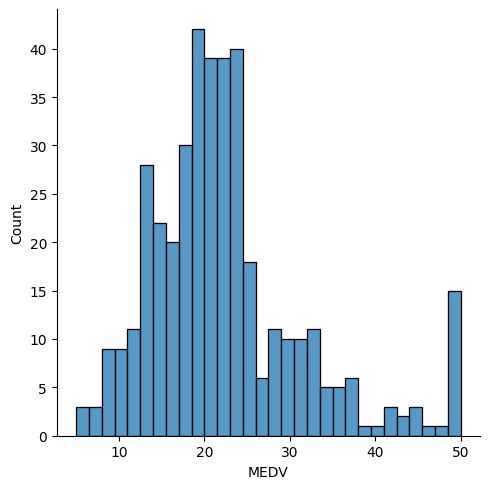

In [13]:
sns.displot(train_df['MEDV'], bins=30)

Let's look for highly correlated features

<Axes: >

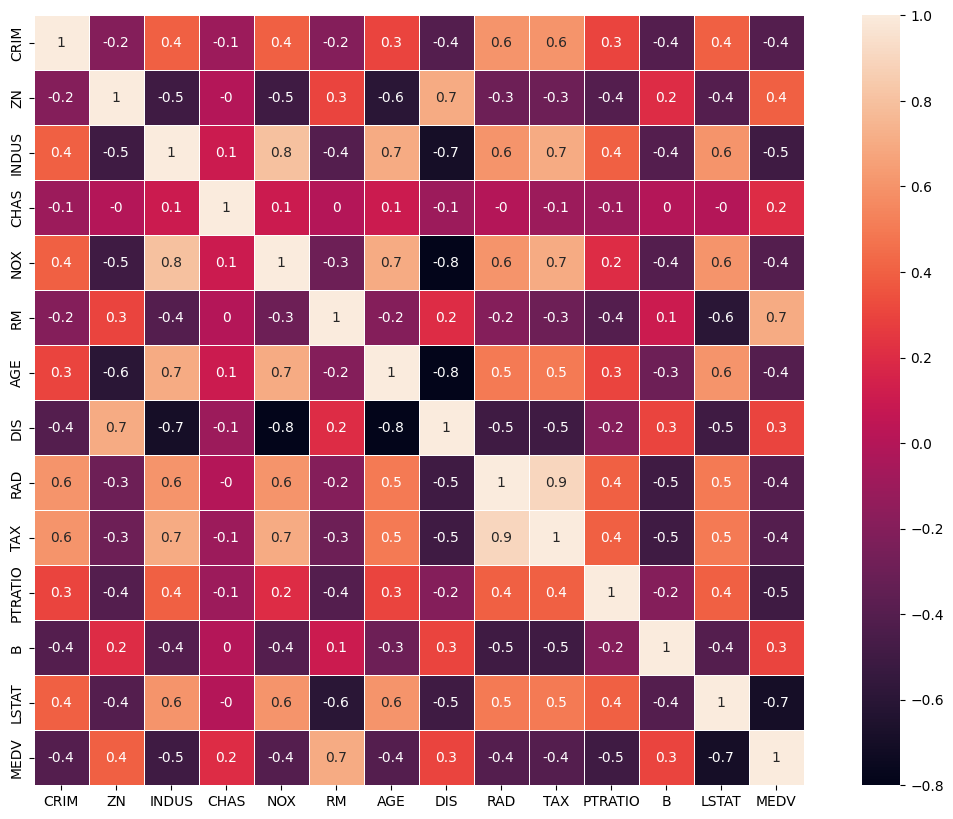

In [14]:
plt.figure(figsize=(15,10))
correlation_matrix = train_df.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, linewidths=0.5, square=True)

From this we can see that `RM` and `LSTAT` have the highest correlation with `MEDV`, our target value

Let's graph these out to see the correlation visually

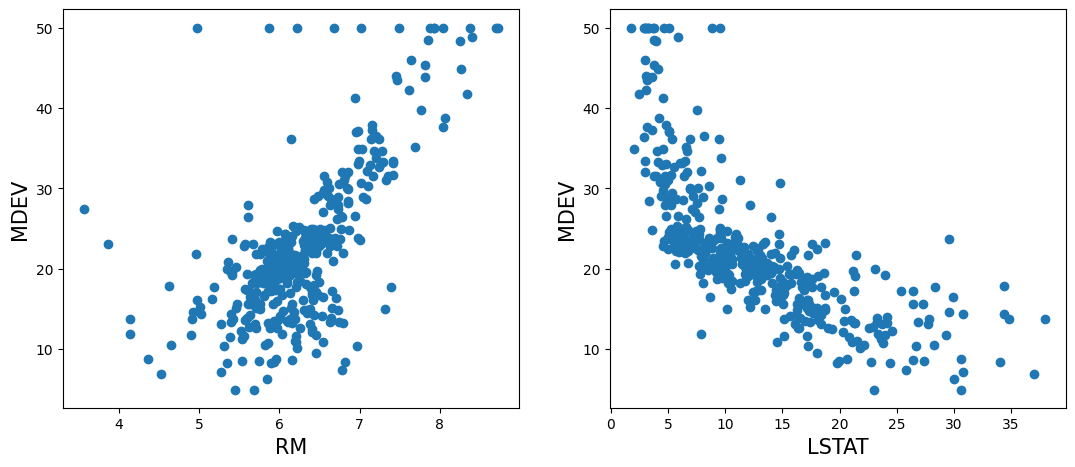

In [15]:
plt.figure(figsize=(20,30))
features = ['RM', 'LSTAT']
target = ['MEDV']

for i, feature in enumerate(features):
  ax = plt.subplot(5, 3, i + 1)   # i + 1 as plot numbering starts at 1, enumerate starts at 0
  plt.scatter(train_df[feature], train_df[target])
  plt.xlabel(feature, fontsize=15)
  plt.ylabel('MDEV', fontsize=15)

plt.show()


## Data Prep and Pre-Processing

Typically we'll need to perform a level of pre-processing on any dataset. As we've seen previously, different features in our dataset are on vastly different scales. This can impede training, so let's start by normalising our values


In [16]:
def normalise_features(features, mean=None, std=None):
  features_mean = np.mean(features, axis=0) if not mean else mean
  features_std = np.std(features, axis=0) if not std else std
  return (features - features_mean) / features_std, mean, std

train_features, train_mean, train_std = normalise_features(train_features)
test_features, _, _ = normalise_features(test_features, train_mean, train_std)

In [17]:
np.amax(train_features, axis=0)

array([9.23484718, 3.72899018, 2.44537425, 3.89358447, 2.67733525,
       3.46718635, 1.11048828, 3.43740568, 1.67588577, 1.83609694,
       1.60353052, 0.44807713, 3.48201936])

In [18]:
np.amin(train_features, axis=0)

array([-0.40510053, -0.48361547, -1.56469648, -0.25683275, -1.47126853,
       -3.81725032, -2.36904226, -1.28750316, -0.97156928, -1.31131055,
       -2.67375227, -3.77110135, -1.51966384])

## What is the alternative approach ?

## Building our first Neural Network

We'll now build a simple neural network using TF Keras. We'll start with a basic `Sequential` model type containing an input layer (which TF will add behind the scenes for us), a dense layer with 20 neurons and an output layer with a single neuron.

We'll compile the model using the Adam optimizer, calculating loss using MSE, and accuracy metrics as MAE and MSE.

In [19]:
def build_model(input_shape):
    model = keras.Sequential([
        Dense(20, activation="relu", input_shape=(input_shape, )),
        Dense(1)
    ])

    model.compile(optimizer=Adam(),
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

Let's build the model, we can then visualise this in tabular format using `model.summary()`

In [20]:
model = build_model(input_shape=train_features.shape[1])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the model

In [21]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
train_history = model.fit(
    train_features,
    train_labels,
    epochs=1000,
    verbose=2,
    validation_split=0.1,
    callbacks=[early_stop]
)

Epoch 1/1000
12/12 - 1s - loss: 605.8741 - mae: 22.7106 - mse: 605.8741 - val_loss: 505.9974 - val_mae: 21.5253 - val_mse: 505.9974 - 968ms/epoch - 81ms/step
Epoch 2/1000
12/12 - 0s - loss: 594.0922 - mae: 22.4683 - mse: 594.0922 - val_loss: 496.5691 - val_mae: 21.3002 - val_mse: 496.5691 - 50ms/epoch - 4ms/step
Epoch 3/1000
12/12 - 0s - loss: 583.1283 - mae: 22.2322 - mse: 583.1283 - val_loss: 487.2361 - val_mae: 21.0800 - val_mse: 487.2361 - 67ms/epoch - 6ms/step
Epoch 4/1000
12/12 - 0s - loss: 572.3244 - mae: 22.0010 - mse: 572.3244 - val_loss: 477.7083 - val_mae: 20.8523 - val_mse: 477.7083 - 67ms/epoch - 6ms/step
Epoch 5/1000
12/12 - 0s - loss: 561.5052 - mae: 21.7662 - mse: 561.5052 - val_loss: 468.4864 - val_mae: 20.6305 - val_mse: 468.4864 - 49ms/epoch - 4ms/step
Epoch 6/1000
12/12 - 0s - loss: 551.0312 - mae: 21.5341 - mse: 551.0312 - val_loss: 459.2109 - val_mae: 20.4009 - val_mse: 459.2109 - 51ms/epoch - 4ms/step
Epoch 7/1000
12/12 - 0s - loss: 540.4324 - mae: 21.2970 - mse:

Let's draw out how our metrics improve over training

(0.0, 50.0)

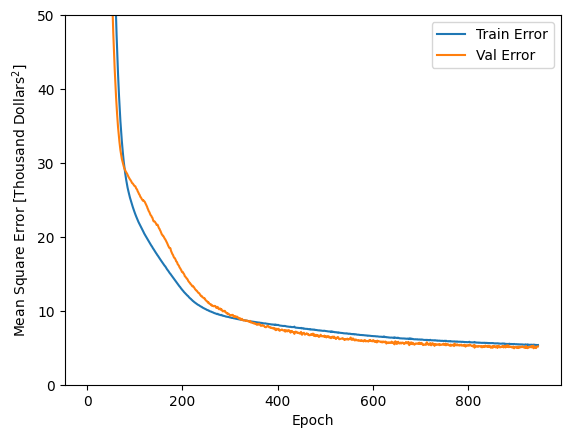

In [22]:
  hist = train_history.history
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
  plt.plot(train_history.epoch, hist['mse'], label='Train Error')
  plt.plot(train_history.epoch, hist['val_mse'], label = 'Val Error')
  plt.legend()
  plt.ylim([0,50])



And show the RMSE (Root Mean Squared Error) for our test set

In [23]:
train_features.shape

(404, 13)

In [24]:
test_features, test_labels

(array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
         -4.27829517,  2.51324773],
        [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
          0.3909446 ,  0.58604286],
        [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
          0.41570668, -0.38506427],
        ...,
        [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
          0.32313459, -1.55879807],
        [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
          0.34967446, -0.38956708],
        [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
         -1.57465677, -0.3745577 ]]),
 array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
        14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
        20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
        23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
        32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
   

In [25]:
score = model.evaluate(test_features, test_labels, verbose=2)
print('Test RMSE: {:0.2f}'.format(np.sqrt(score[2])))

4/4 - 0s - loss: 14.6693 - mae: 2.6464 - mse: 14.6693 - 27ms/epoch - 7ms/step
Test RMSE: 3.83


In [30]:
y_hat = model.predict(test_features)

4/4 [==============================] - 0s 3ms/step


In [32]:
from sklearn.metrics import r2_score
r2_score(test_labels, y_hat)

0.8237790489737562

Text(0, 0.5, 'Predicted')

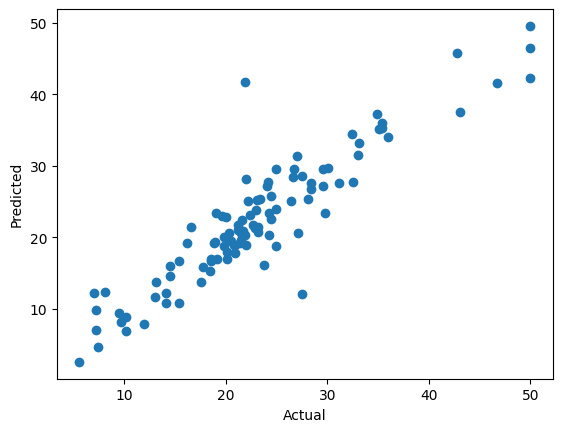

In [34]:
plt.scatter(test_labels,y_hat)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### How about other models ?

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(    train_features, train_labels, )

In [28]:
reg.score(test_features, test_labels)

0.7479339847470935

In [29]:
reg.score(train_features, train_labels)

0.7399643695249463

Text(0, 0.5, 'Predicted')

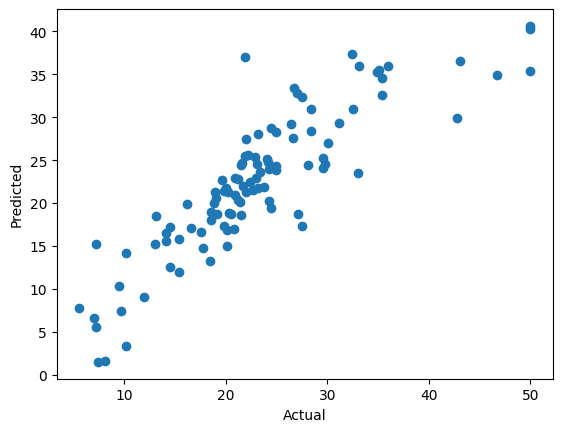

In [35]:
plt.scatter(test_labels,reg.predict(test_features))
plt.xlabel('Actual')
plt.ylabel('Predicted')